# DateTime Index

Built-in Python libraries for dates and times

In [1]:
from datetime import datetime # allows creation of timestamps/specific date objects

In [2]:
# variables
my_year = 2019
my_month = 5
my_day = 1

In [3]:
# datetime functionality, takes in year, month, day, time
my_date = datetime(my_year, my_month, my_day)

In [4]:
my_date

datetime.datetime(2019, 5, 1, 0, 0)

In [5]:
# convert a list of two datetime objects to an index:
my_list = [datetime(2019,1,1), datetime(2019,1,2)]

In [9]:
# convert a NumPy array or list to an index
dt_idx = pd.DatetimeIndex(my_list)

***

# Time Resampling

Financial datasets - data has DateTime index on smaller scale <br>
Better to aggregate data based on some frequency <br>
Eg: monthly, quarterly, etc. <br>
pandas has frequency sampling tools <br>     
Download stock market data from Yahoo Finance

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# upload data to Google Colab
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [14]:
# read csv file
df = pd.read_csv('TSLA.csv')

In [15]:
# want Date column to be index
# convert it to a datetime index with pd.to_datetime()
# pass in the Series
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null datetime64[ns]
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


Set Date column as index:

In [17]:
# Set index_col='Date' and set parse_dates=True
df.set_index('Date', inplace=True)

check the index with `df.index`:

In [18]:
df = pd.read_csv('TSLA.csv', index_col='Date', parse_dates=True)

In [19]:
df.index

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14',
               ...
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

To do time resampling, need datetime index <br>
Resample DataFrame with `df.resample()` <br>
Pass in a `rule`

`rule` is how we want to resample the data <br>
[Every type of time series offset strings](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

`rule` is acting as a `GroupBy` method specifically for time series data

Example of the A `rule` <br>
"Year-end frequency" <br>
Get mean value based off resampling:

In [20]:
# mean value based off the end of the year resampling
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,316.121124,322.733018,309.173609,316.176864,316.176864,9.352651e+06
2019-12-31,292.084269,296.846952,286.832561,292.291341,292.291341,9.131140e+06


Mean Open value for everything before 2018-12-31 = \\$316.12 <br>
Mean Open value for everything between 2018-12-31 & 2019-12-31 = \\$292.08

Get mean value after quarterly resampling with Q `rule`:

In [22]:
# mean value based off quarterly resampling
df.resample(rule='Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-30,311.549303,318.084884,306.454416,312.194420,312.194420,8.581470e+06
2018-09-30,312.176985,318.600160,305.223175,312.416032,312.416032,1.025022e+07
2018-12-31,323.185714,330.038412,314.980000,322.655873,322.655873,8.981444e+06
2019-03-31,300.713771,305.809344,295.272622,301.116720,301.116720,8.491733e+06
2019-06-30,267.017618,270.813337,262.316192,266.655716,266.655716,1.098847e+07


***

# Time Shifts

Often, time series forecasting models require forward and backward shifting of data with a certain amount of time steps. <br>
Use Panda's `.shift()` method

To shift time period up by 1 step, use: <br>
`df.shift(periods = 1).head()`

In [23]:
df.shift(periods=1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02,293.510010,300.820007,293.220001,299.920013,299.920013,4625600.0
2018-05-03,298.570007,306.850006,297.779999,301.149994,301.149994,8970400.0
2018-05-04,278.790009,288.040009,275.230011,284.450012,284.450012,17352100.0
2018-05-07,283.000000,296.859985,279.519989,294.089996,294.089996,8569400.0


First time period will no longer have any values. <br>
To shift time period backwards by 1 step, use: <br>
`df.shift(periods = -1).head()`

***

# Pandas Rolling & Expanding

To create a rolling mean based off a given time period, <br>
Use pandas' `.rolling()` method

Daily financial data can be noisy. <br>
To generate a signal about the general trend of the data, <br>
Use rolling mean / Moving Average

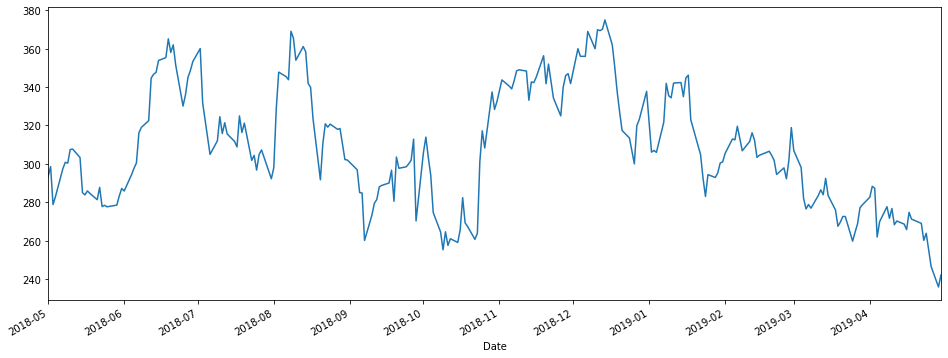

In [24]:
# Plot daily data
df['Open'].plot(figsize=(16,6))

To average out by the week, either Get Moving Average on: <br>
- A particular column or Series
- The entire DataFrame with `.rolling()` method


In [28]:
# Pass in 7 as window
# Then add aggregate function .mean()
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,293.225717,301.898573,291.424286,298.742859,298.742859,8.550443e+06
2018-05-10,295.224287,303.637142,292.979998,299.471427,299.471427,8.697014e+06
2018-05-11,296.528573,303.927141,293.165710,299.458570,299.458570,8.084043e+06


First 6 values are null. <br>
7th value = mean of first 6 rows

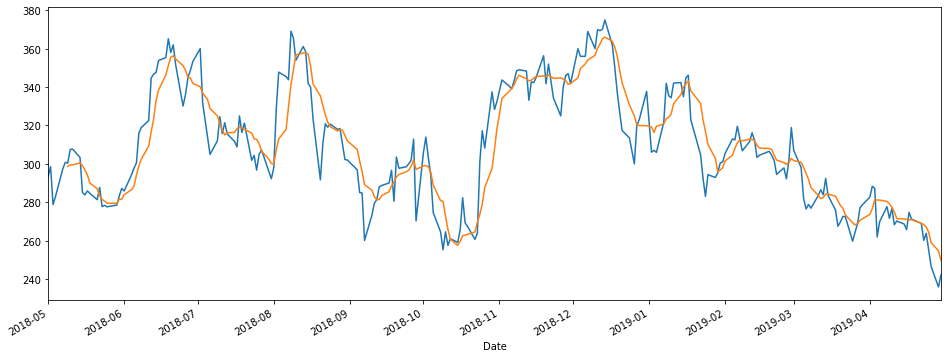

In [29]:
# Plot the Open column VS 7-day moving average of Close column:
df['Open'].plot()
df.rolling(7).mean()['Close'].plot(figsize=(16,6))

Blue line = Open price column <br>
Orange line = Rolling 7-day Close price

Instead of taking 7-day rolling window, <br>
Account everything since the beginning of the time series to where we are at that point.

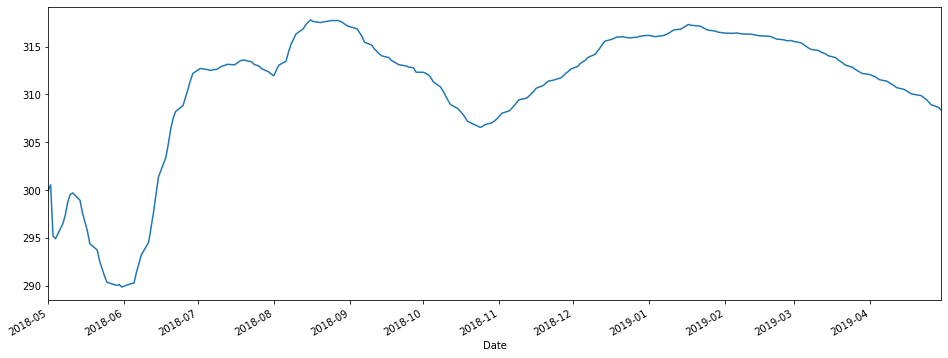

In [31]:
# Use .expanding() method
df['Close'].expanding().mean().plot(figsize=(16,6))

Each time step on x-axis, y-axis shows value of everything that came before it averaged out.

***

# Bollinger Bands

Bollinger Bands are volatility bands placed above and below a moving average, where the volatility is based off the standard deviation which changes as volatility increases or decreases.

Volatility increases -> Bands widen <br>
Volatility decreases -> Bands narrow

Create 3 columns and plot them: <br>
1. Closing 20-day Moving Average
2. Upper band equal to 20-day MA + 2 times the Standard Deviation over 20 days
3. Lower band equal to 20-day MA - 2 times the Standard Deviation over 20 days

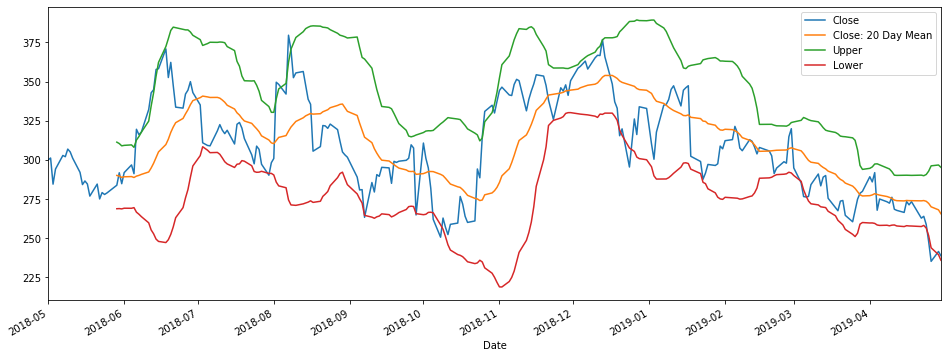

In [34]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())

# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

# Plot Close
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

***

# Time Series Analysis

- Introduction to Statsmodel
- ETS Models & Decomposition
- EWMA Models
- ARIMA Models

## Introduction to Statsmodel

The most popular Python library for dealing with time series data is [StatsModels](https://www.statsmodels.org/stable/index.html):

`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

StatsModels is heavily inspired by the statistical programming language R. <br>
Used to explore data, estimate statistical models, and perform statistical tests. <br>

Using [time series analysis](https://www.statsmodels.org/stable/tsa.html) `tsa module`:

Import `statsmodels.api as sm` <br>
Then load a dataset that comes with the library <br>
Then load macrodata dataset:

In [38]:
import statsmodels.api as sm

# import dataset with load_pandas() method and .data attribute
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Set the year to be the time series index:

In [40]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))
df.index = index

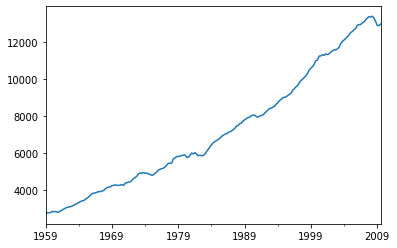

In [41]:
# Plot realgdp column
df['realgdp'].plot()

Hodrick-Prescott filter: <br>
$sm.tsa.fi < ers.hpfi < er(df['realgdp'])$

This returns a tuple of the estimated cycle and estimated trend in the data.

Use tuple unpacking to get trend. <br>
Plot

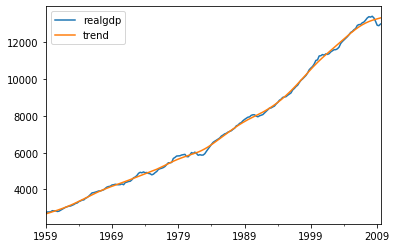

In [42]:
# Tuple unpacking to get trend
# Plot it on top of current trend
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

# add a column for the trend
df['trend'] = gdp_trend

# plot the real gdp & the trend
df[['realgdp','trend']].plot()

## Error-Trend-Seasonality (ETS) Models with StatsModels

ETS models take each of the terms for smoothing purposes - and may add them, multiply them, or leave some of them out of the model. <br>
A model to fit data will be created based off these factors.

Time Series Decomposition with ETS is a method to break down a time series into ETS components.

In [44]:
# ETS decomposition for TSLA csv
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('TSLA.csv')
result = seasonal_decompose(df['Adj Close'], model='additive', freq=12)

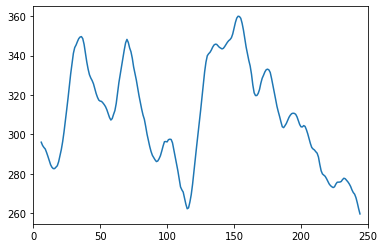

In [45]:
# Plot out the components - trend
result.trend.plot()

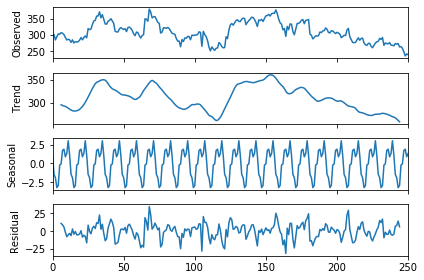

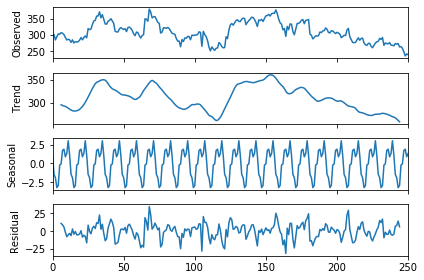

In [46]:
# Plot all the results
result.plot()

## Exponentially Weighted Moving Average (EWMA) Models

With `pd.rolling()`, a simple model (SMA) that describes a trend of a time series can be created. <br>
Some weaknesses of SMA: <br>
- Smaller window leads to more noise rather than signal
- Always lag size of window
- Will never reach peak / valley of data due to averaging
- Doesn't inform about future behaviour
- Extreme historical values can skew SMA

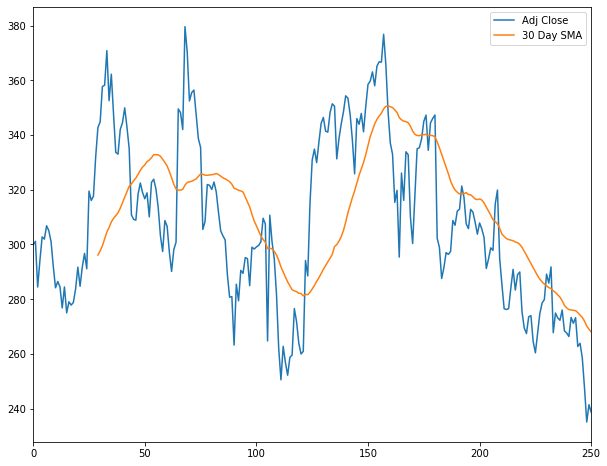

In [47]:
# create 1 month SMA off of Adj Close
df['30 Day SMA'] = df['Adj Close'].rolling(window=30).mean()

# plot SMA & Adj Close
df[['Adj Close', '30 Day SMA']].plot(figsize=(10,8))

EWMA solves some issues: <br>
- Able to reduce lag time from SMA and put more weight on values that occur more recently
- Amount of weight applied to the recent values depends on the parameters used in the EWMA and the number of periods in the window size

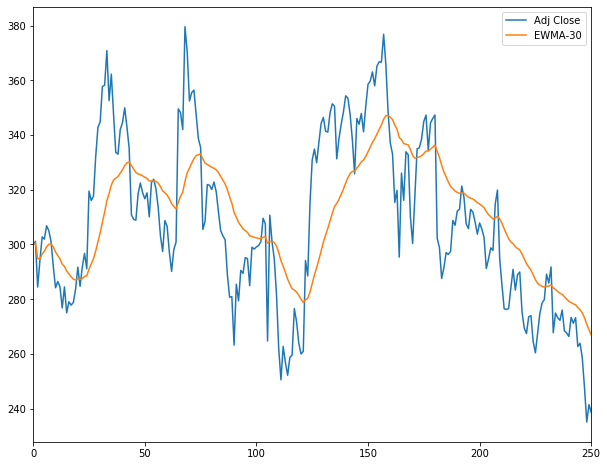

In [49]:
# create EWMA
df['EWMA-30'] = df['Adj Close'].ewm(span=30).mean()

# plot EWMA
df[['Adj Close', 'EWMA-30']].plot(figsize=(10,8))

Behavior at beginning different from end since the more recent points are weighted more heavily.

## ARIMA

Often don't work well with historical market data.